In [854]:
from turtle import color
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import cm
import math

In [855]:
def generateColors(N):
    colors = cm.rainbow(np.linspace(0, 1, N))
    return colors

In [856]:
def generateNormalPoints(count, x, y):
    xy = np.zeros([count, 2])
    xy[:, 0] = np.random.normal(x, 1, count)
    xy[:, 1] = np.random.normal(y, 1, count)
    return xy

In [857]:
def showPoints(x):
    plt.plot(x[:, 0], x[:, 1], 'c.')
    plt.show()

In [858]:
def generateWeights(N, M):
    weights = np.random.random([N, M])*4-2
    return weights

def showWeights(weights):
    print("Wartosci wag:")
    print(weights)

In [859]:
def showPointsAndWeights(x, weights):
    plt.plot(x[:, 0], x[:, 1], 'c.', label="punkty")
    plt.plot(weights[:,0], weights[:,1], 'bo', label="neurony")
    plt.legend()
    plt.show()

In [860]:
def winner(xx, weights, N):
    d = np.zeros(N)
    for i in range(N):
        for n in range(M):
            d[i] += (xx[n] - weights[i, n])**2
        d[i] = math.sqrt( d[i] )
    z = np.argmin(d)
    return z

In [861]:
def distance(xx, yy, M):
    d = 0
    for n in range(M):
        d += (xx[n]-yy[n])**2
    return math.sqrt( d )

In [862]:
def learn(x, n, weights, N, M):
    E = np.zeros(N)
    for l in range(n):
        for i in range(len(x)):
            z = winner(x[i], weights, N)
            for j in range(M):
                weights[z,j] = weights[z,j] + 0.01*(x[i,j]-weights[z,j])

        e = 0
        for i in range(len(x)):
            z = winner(x[i], weights, N)
            e += distance(x[i], weights[z], M)
        e = e/len(x)
        if(E[z] - e == 0.0):
            return l
        E[z] = e

In [863]:
def splitByClass(x, weights, N):
    klas = np.zeros(len(x))
    for i in range(len(x)):
        z = winner(x[i], weights, N)
        klas[i]=z
    return klas

In [864]:
def showPointsAndWeightsAndClasses(x, weights, klasa, colors):
    for i in range(N):
        plt.plot(x[klasa[:]==i,0], x[klasa[:]==i,1], '.', label="klasa "+str(i), color=colors[i])
    plt.plot(weights[:,0], weights[:,1], 'bo', label="neuron")
    plt.legend()
    plt.show()

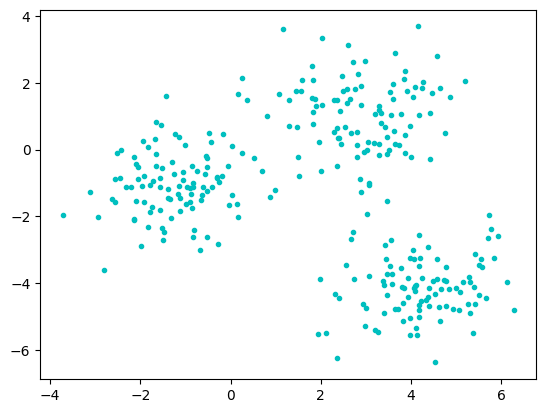

Wartosci wag:
[[-0.85675309  0.25584613]
 [ 1.99426963  0.1319459 ]
 [ 0.80867217 -0.9239017 ]
 [ 0.73872244  0.25370091]
 [-0.69842598 -1.26258908]]


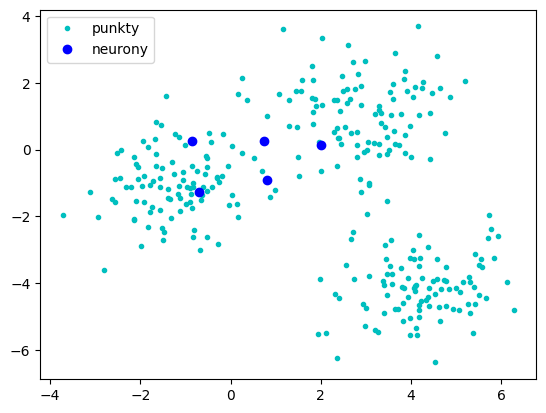

In [865]:
N = 5 #liczba neuronow
M = 2 #liczba wag (liczba współrzędnych punktów)
weights = generateWeights(N, M)

xx1 = generateNormalPoints(100, -1, -1)
xx2 = generateNormalPoints(100, 3, 1)
xx3 = generateNormalPoints(100, 4, -4)

x = np.concatenate([xx1, xx2, xx3])

showPoints(x)
showWeights(weights)
showPointsAndWeights(x, weights)

Liczba epok: 85


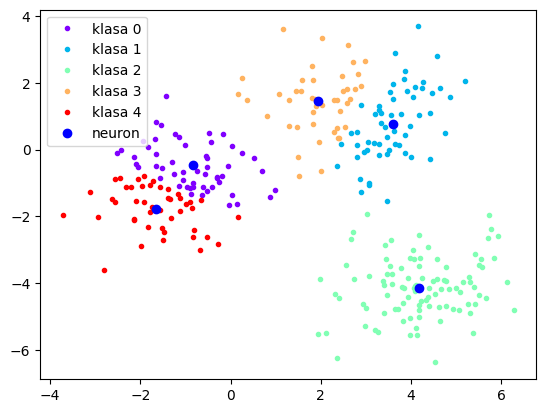

In [866]:
l = learn(x, 100, weights, N, M)
print("Liczba epok:",l)
klasa = splitByClass(x, weights, N)
colors = generateColors(N)
showPointsAndWeightsAndClasses(x, weights, klasa, colors)

In [867]:
def generateRandomPoints(count, low, high):
    xy = np.zeros([count, 2])
    xy[:, 0] = np.random.random(count) * (high-low) + low
    xy[:, 1] = np.random.random(count) * (high-low) + low
    return xy

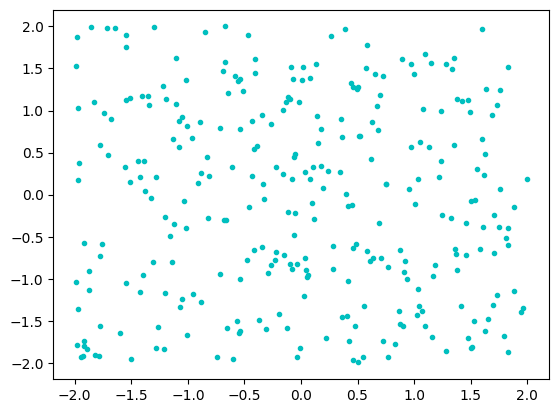

Wartosci wag:
[[-1.44352983  1.00924636]
 [-1.50159404 -1.55274445]
 [-0.15401921 -0.79301832]
 [ 0.41876984  1.52653354]
 [ 0.97760873  0.3673338 ]
 [ 1.29311127 -1.9988138 ]
 [ 0.69721945  1.61161635]]


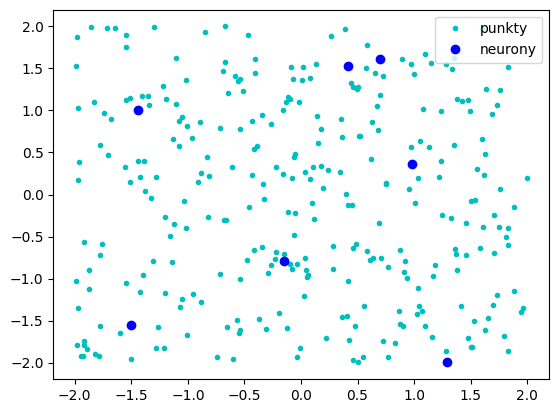

In [868]:
N = 7 #liczba neuronow
M = 2 #liczba wag (liczba współrzędnych punktów)
weights = generateWeights(N, M)

x = generateRandomPoints(300, -2, 2)

showPoints(x)
showWeights(weights)
showPointsAndWeights(x, weights)

Liczba epok: None


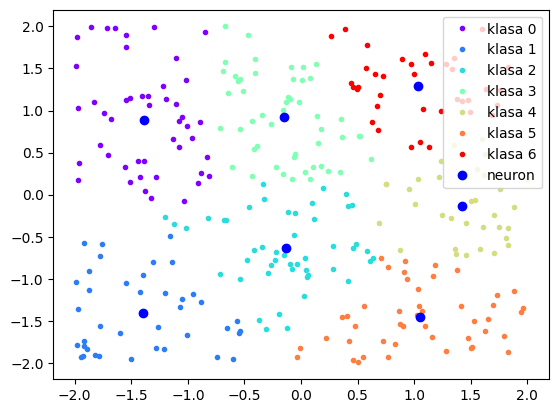

In [869]:
l = learn(x, 100, weights, N, M)
print("Liczba epok:",l)
klasa = splitByClass(x, weights, N)
colors = generateColors(N)
showPointsAndWeightsAndClasses(x, weights, klasa, colors)

In [870]:
def generate3DNormalPoints(count, x, y, z):
    xyz = np.zeros([count, 3])
    xyz[:, 0] = np.random.normal(x, 1, count)
    xyz[:, 1] = np.random.normal(y, 1, count)
    xyz[:, 2] = np.random.normal(z, 1, count)
    return xyz

In [871]:
def show3DPoints(x):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0], x[:,1], x[:,2], color="orange")
    plt.show()

In [872]:
def show3DPointsAndWeights(x, weights):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0], x[:,1], x[:,2], color="orange", label="punkty")
    ax.scatter(weights[:,0], weights[:,1], weights[:,2], color="black", label="neurony")
    plt.legend()
    plt.show()

In [873]:
def show3DPointsAndWeightsAndClasses(x, weights, klasa, colors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(N):
        ax.scatter(x[klasa[:]==i,0], x[klasa[:]==i,1], x[klasa[:]==i,2], '.', label="klasa "+str(i), color=colors[i])
    ax.scatter(weights[:,0], weights[:,1], weights[:,2], color="black", label="neuron")
    plt.legend()
    plt.show()

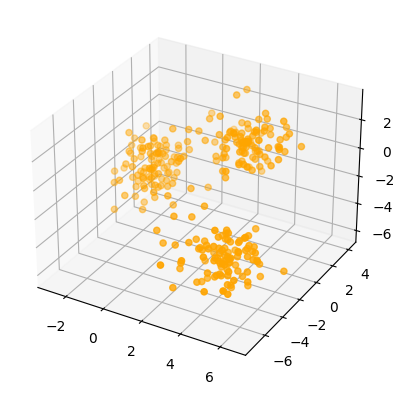

Wartosci wag:
[[ 0.82946663  0.14358158  0.766722  ]
 [ 0.15763446 -0.12603326 -0.92684114]
 [ 0.20764974  1.0510409  -0.75725494]]


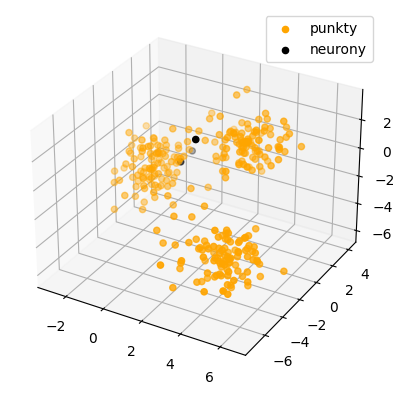

In [874]:
N = 3 #liczba neuronow
M = 3 #liczba wag (liczba współrzędnych punktów)
weights = generateWeights(N, M)

xx1 = generate3DNormalPoints(100, -1, -1, -1)
xx2 = generate3DNormalPoints(100, 3, 1, 1)
xx3 = generate3DNormalPoints(100, 4, -4, -4)

x = np.concatenate([xx1, xx2, xx3])

show3DPoints(x)
showWeights(weights)
show3DPointsAndWeights(x, weights)

Liczba epok: 37


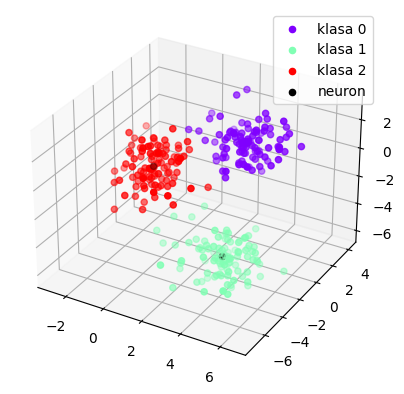

In [875]:
l = learn(x, 1000, weights, N, M)
print("Liczba epok:",l)
klasa = splitByClass(x, weights, N)
colors = generateColors(N)
show3DPointsAndWeightsAndClasses(x, weights, klasa, colors)